In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score ,accuracy_score
from imblearn.over_sampling import SMOTE

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Fraud.csv')

In [ ]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None


In [ ]:
missing_values = data.isnull().sum()


In [ ]:
missing_columns = missing_values[missing_values > 0]
print(missing_columns) #no missing values

Series([], dtype: int64)


In [ ]:
print(data['isFraud'].value_counts(normalize=True))


isFraud
0    0.998709
1    0.001291
Name: proportion, dtype: float64


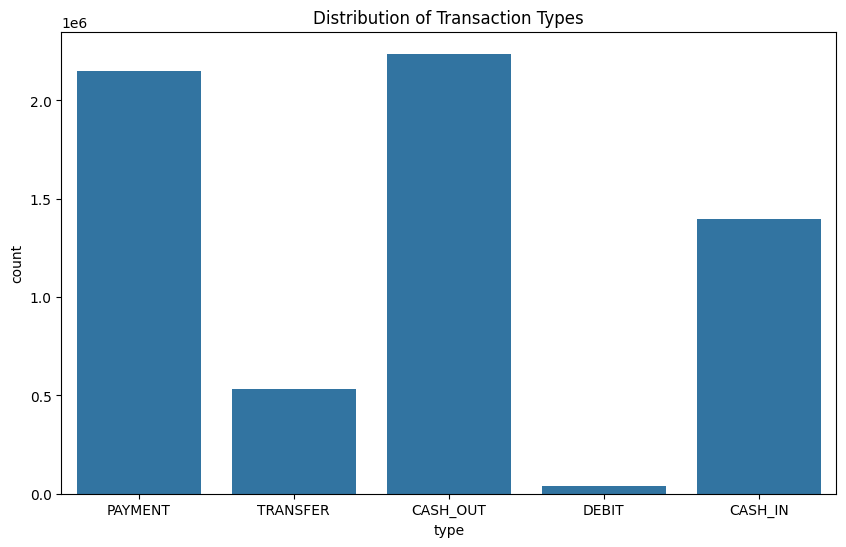

In [ ]:
# Visualize transaction types
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=data)
plt.title('Distribution of Transaction Types')
plt.show()

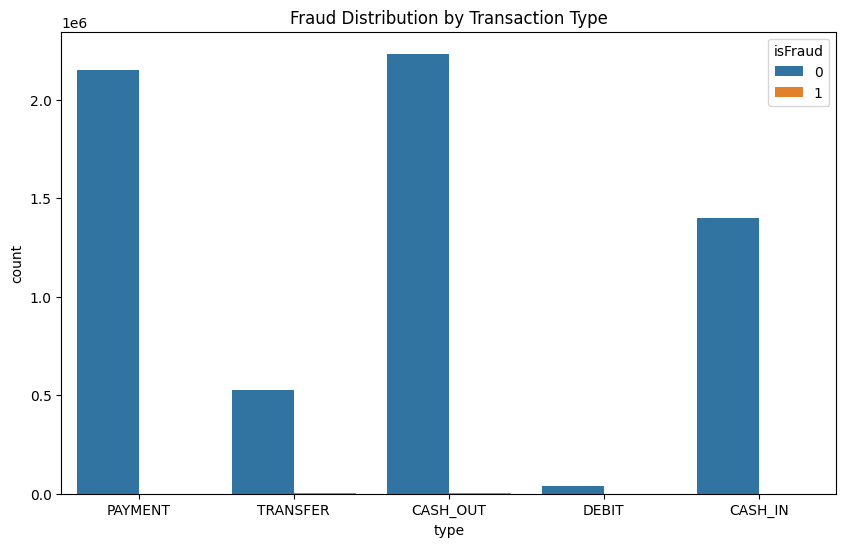

In [ ]:
# Visualize fraud distribution by transaction type
plt.figure(figsize=(10, 6))
sns.countplot(x='type', hue='isFraud', data=data)
plt.title('Fraud Distribution by Transaction Type')
plt.show()

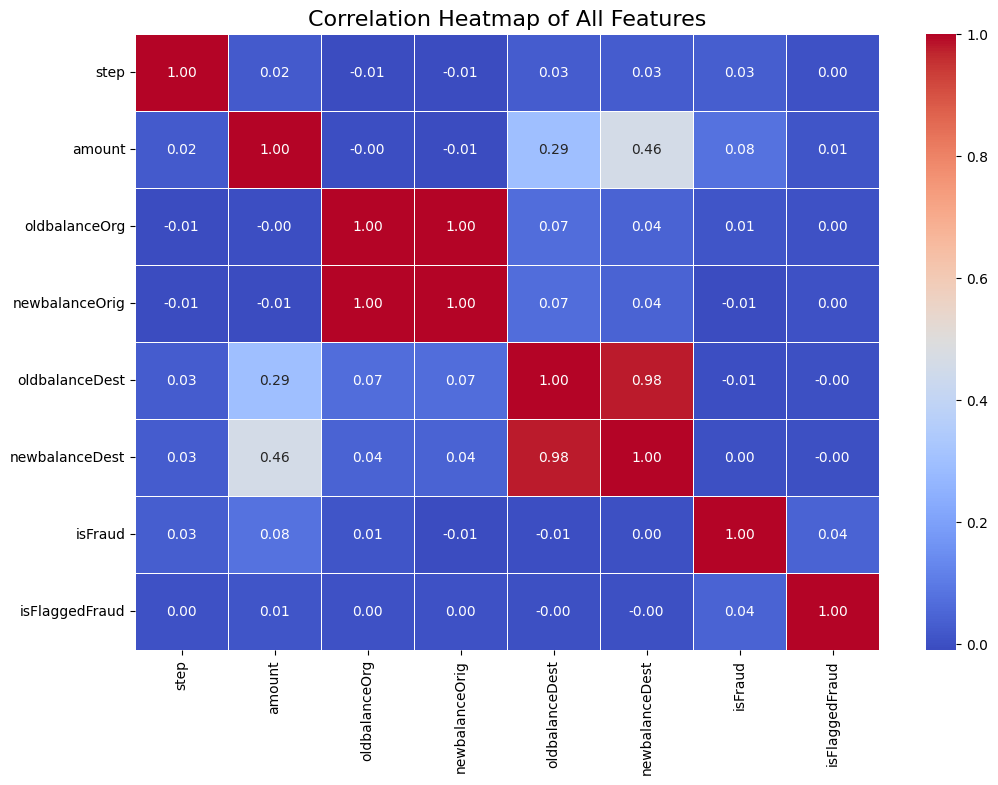

In [ ]:
numerical_columns = data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numerical_columns.corr()
# Compute the correlation matrix


# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)

# Add title and labels for clarity
plt.title('Correlation Heatmap of All Features', fontsize=16)
plt.show()


In [ ]:
data['amount_ratio'] = data['amount'] / (data['oldbalanceOrg'] + 1)

# Create a feature for balance change
data['balance_change'] = data['newbalanceOrig'] - data['oldbalanceOrg']

# Create a binary feature for transactions to/from merchants
data['is_to_merchant'] = (data['nameDest'].str[0] == 'M').astype(int)

# 4. Data Preprocessing
print("Preprocessing data...")

# Select features
features = ['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
            'oldbalanceDest', 'newbalanceDest', 'amount_ratio',
            'balance_change', 'is_to_merchant']

X = data[features]
y = data['isFraud']


Preprocessing data...


In [ ]:
X = pd.get_dummies(X, columns=['type'])


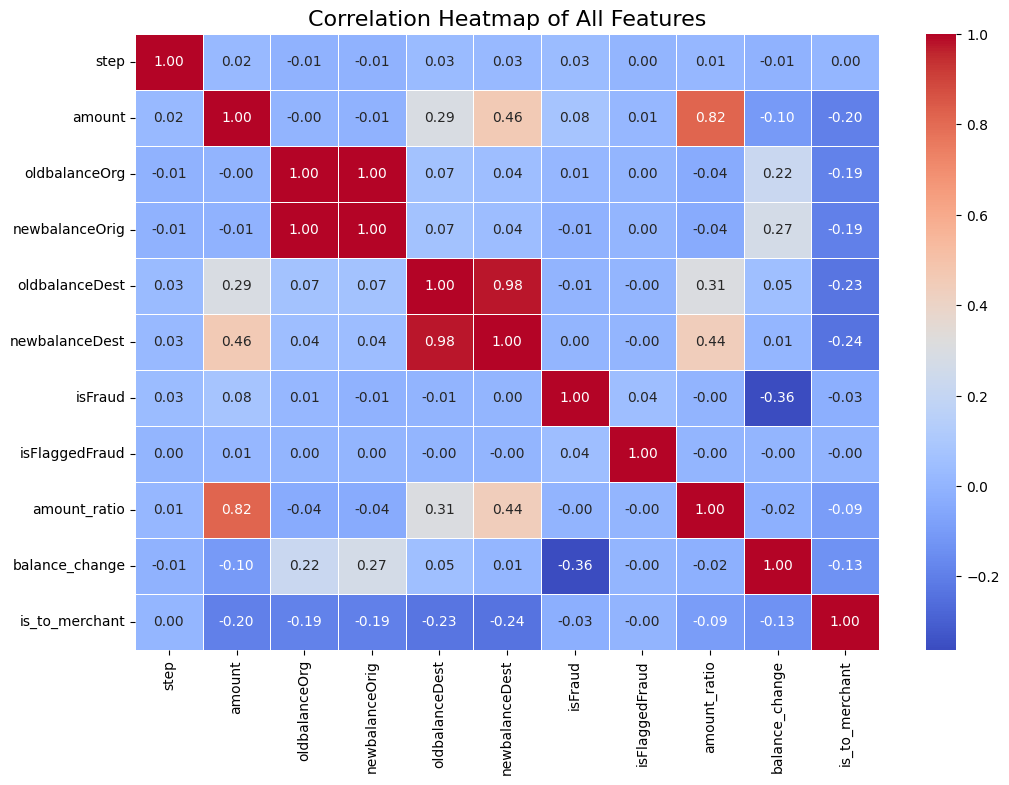

In [ ]:
numerical_columns = data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numerical_columns.corr()
# Compute the correlation matrix


# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)

# Add title and labels for clarity
plt.title('Correlation Heatmap of All Features', fontsize=16)
plt.show()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

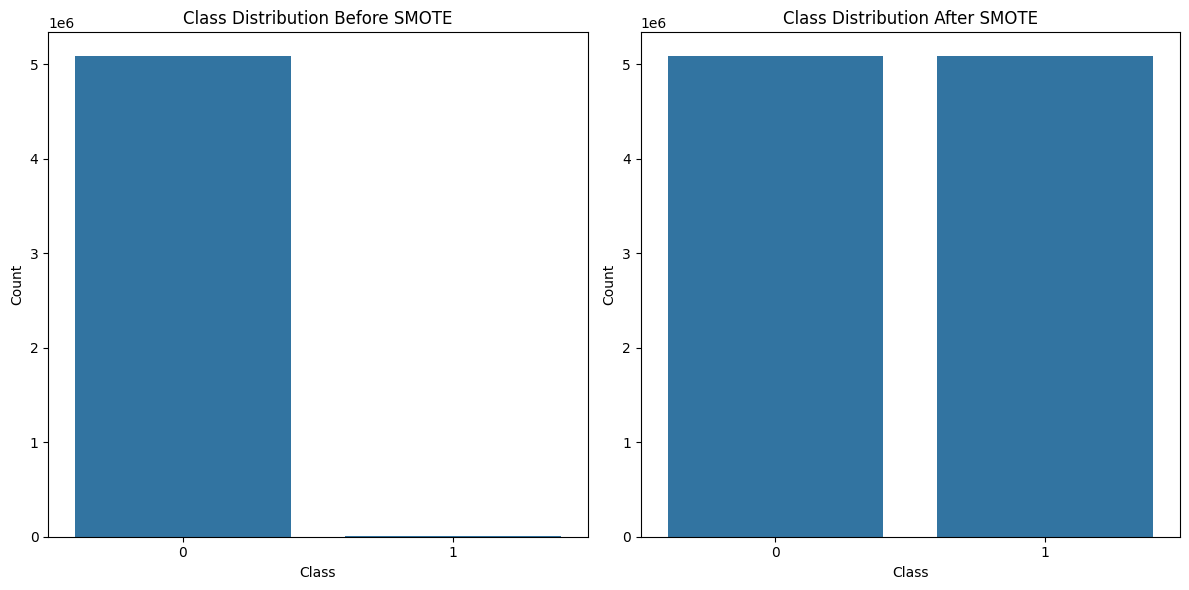

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')

# Plotting the class distribution after SMOTE
plt.subplot(1, 2, 2)
sns.countplot(x=y_train_resampled)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test_scaled)
y_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.46      0.99      0.62      1620

    accuracy                           1.00   1272524
   macro avg       0.73      0.99      0.81   1272524
weighted avg       1.00      1.00      1.00   1272524



In [ ]:
print("AUC-ROC score:", roc_auc_score(y_test, y_pred_proba))


AUC-ROC score: 0.9989276049873859


In [ ]:
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))


Accuracy on Test Set: 0.9984817575149859


In [ ]:
# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


           Feature  Importance
6   balance_change    0.352887
0           amount    0.150665
1    oldbalanceOrg    0.122171
2   newbalanceOrig    0.112583
12   type_TRANSFER    0.044609
5     amount_ratio    0.043659
7   is_to_merchant    0.041733
4   newbalanceDest    0.040577
3   oldbalanceDest    0.030365
11    type_PAYMENT    0.023702
9    type_CASH_OUT    0.020407
8     type_CASH_IN    0.016144
10      type_DEBIT    0.000498


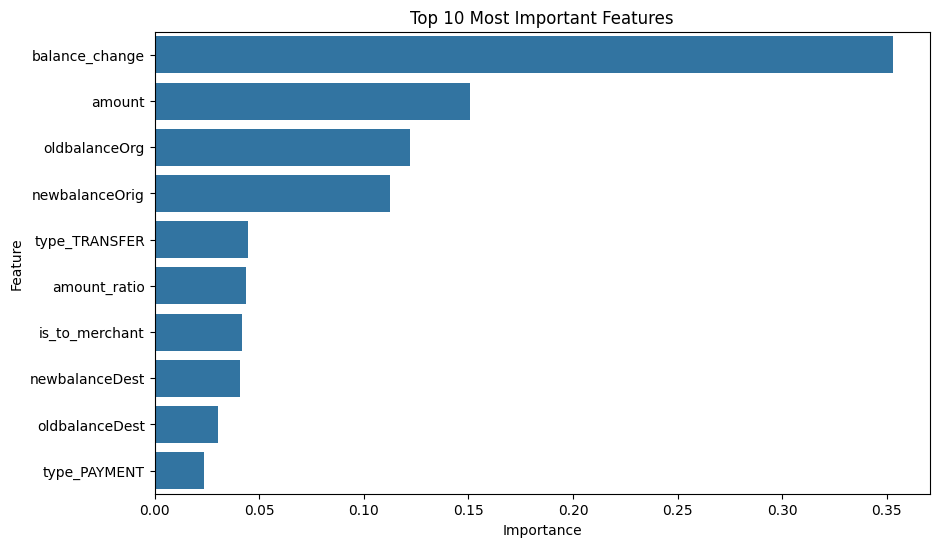

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))  # Adjust to show top 10 features
plt.title('Top 10 Most Important Features')
plt.show()

USING XGBOOST


In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(
    n_estimators=100,       # Number of trees in the forest
    max_depth=5,            # Maximum depth of each tree
    learning_rate=0.1,      # Learning rate (eta)
    subsample=0.8,          # Subsample ratio of the training instances
    colsample_bytree=0.8,   # Subsample ratio of columns when constructing each tree
    random_state=42,        # Random seed for reproducibility
    scale_pos_weight=1,     # Balancing the positive and negative weights
    use_label_encoder=False # Disabling label encoder for XGBoost
)

# Train the model on the resampled training data
xgb_model.fit(X_train_resampled, y_train_resampled)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:13:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Predict probabilities for the test set
y_test_pred_proba = xgb_model.predict_proba(X_test_scaled)[:, 1]


In [ ]:
test_auc = roc_auc_score(y_test, y_test_pred_proba)
print("Test AUC-ROC Score:", test_auc)

Test AUC-ROC Score: 0.9992055416877171


In [ ]:
y_test_pred = xgb_model.predict(X_test_scaled)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.29      1.00      0.45      1620

    accuracy                           1.00   1272524
   macro avg       0.64      1.00      0.72   1272524
weighted avg       1.00      1.00      1.00   1272524



We notice that using both the values we get a good recall value but our precision value is less( 0.46 in random forest and 0.29 in xgboost) so we use random forest and try to increase the precision value there.

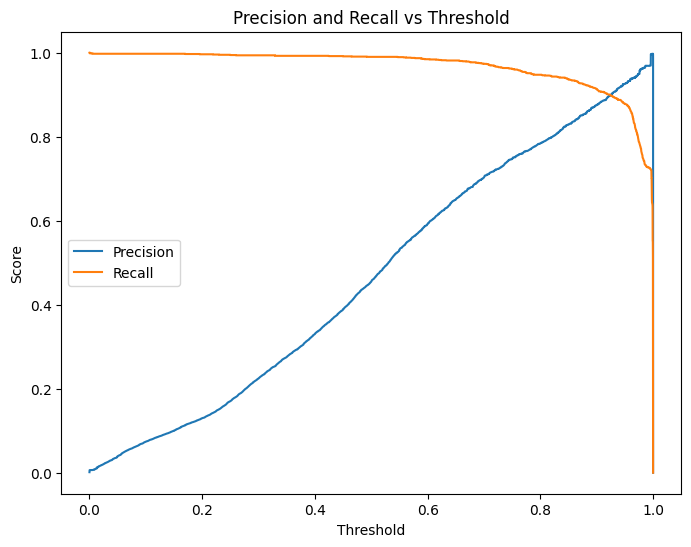

In [ ]:
from sklearn.metrics import precision_recall_curve

# Get the predicted probabilities for the positive class (fraud)
y_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# Calculate precision and recall for different thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba_rf)

# Plot precision and recall as a function of the decision threshold
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Threshold')
plt.legend()
plt.show()


In [ ]:
optimal_threshold = 0.9  # Example threshold
y_pred_custom = (y_proba_rf >= optimal_threshold).astype(int)

# Re-evaluate the model with the custom threshold
print(classification_report(y_test, y_pred_custom))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.88      0.91      0.89      1620

    accuracy                           1.00   1272524
   macro avg       0.94      0.96      0.95   1272524
weighted avg       1.00      1.00      1.00   1272524



We can notice that after changing the threshold value to 0.9 we get a good balnace between the precision and recall values.


QUESTIONS TO BE ANSWERED:

---


1)Describe your fraud detection model in elaboration
A)Initially, I used a Random Forest model. Random Forest is an ensemble learning method that builds multiple decision trees and combines them to get a more accurate and stable prediction.I also experimented with XGBoost, a powerful gradient boosting framework known for its high performance in classification problems.I evaluated your models using metrics such as accuracy, precision, recall, F1-score, and AUC-ROC score, with an emphasis on balancing precision and recall to effectively identify fraudulent transactions.


---
2)How did you select variables to be included in the model?
A)I started initially with all the features like type, amount, oldbalanceOrg, newbalanceOrig, etc. Then we created heatmaps to check how each feature it relevant to other feature. We also created new features like amount_ratio,balance_change,etc from the old features. Finally we also checked with Random Forest as it  provides a ranking of feature importance, which helps in selecting the most predictive features.

---
3)What are the key factors that predict fraudulent customer?Do these factors make sense? If yes, How? If not, How not?
A)Features like amount, oldbalanceOrg, and newbalanceOrig were likely among the most important factors. These features are directly related to the transaction behavior, which is crucial for detecting anomalies.Yes, these factors make sense. For example, large transaction amounts or significant changes in account balances are typical red flags for fraudulent activity.

---
4)What kind of prevention should be adopted while company update its infrastructure?Assuming these actions have been implemented, how would you determine if they work?
A) The company should implement real time fraud detection system like this which gives alerts when it detects any fraudulent activities.The company must also continuously monitor its transactions. We can determine if they work by monitoring the model's performance over time. Use metrics like precision, recall, and AUC-ROC to ensure that the model continues to perform well in detecting fraud.


